In [2]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples, tf.int64)
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples, tf.int64)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.O2FKDU_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.O2FKDU_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
def scale(image, label):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, label

scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [5]:
BUFFER_SIZE = 1000

shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)

train_data = shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE = 100


train_data = train_data.batch(BATCH_SIZE)

validation_data = validation_data.batch(num_validation_samples)

test_data = test_data.batch(num_test_samples)


validation_inputs, validation_targets = next(iter(validation_data))
print(validation_inputs.shape, validation_targets.shape)

(6000, 28, 28, 1) (6000,)


In [6]:
input_size = 784
output_size = 10

hidden_layer_size = 50

# MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')      #output
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
NUM_EPOCHS = 30

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_data,
          epochs=NUM_EPOCHS,
          callbacks=[early_stopping],
          validation_data=(validation_inputs, validation_targets),
          verbose = 1
          )

Epoch 1/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7867 - loss: 0.7594 - val_accuracy: 0.9380 - val_loss: 0.2150
Epoch 2/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9444 - loss: 0.1910 - val_accuracy: 0.9515 - val_loss: 0.1607
Epoch 3/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9588 - loss: 0.1416 - val_accuracy: 0.9597 - val_loss: 0.1351
Epoch 4/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9659 - loss: 0.1138 - val_accuracy: 0.9638 - val_loss: 0.1239
Epoch 5/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9725 - loss: 0.0941 - val_accuracy: 0.9683 - val_loss: 0.1131
Epoch 6/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9770 - loss: 0.0782 - val_accuracy: 0.9693 - val_loss: 0.1090
Epoch 7/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9785 - loss: 0.0709 - val_accuracy: 0.9642 - val_loss: 0.1164
Epoch 8/30
540/540 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9820 - loss: 0.0613 - val_accuracy: 0

In [8]:
test_loss, test_accuracy = model.evaluate(test_data)
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9698 - loss: 0.1135
Test loss: 0.11. Test accuracy: 96.98%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: 5


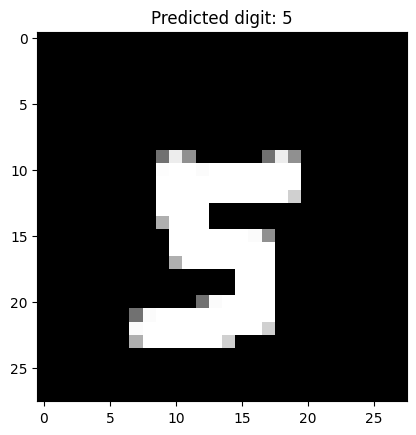

In [17]:
image_path = "img1.png"

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

img = cv2.resize(img, (28, 28))
img = 255 - img
img = img.astype("float32") / 255.0
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)
predictions = model.predict(img)
predicted_class = np.argmax(predictions[0])

print("Predicted class:", predicted_class)

plt.imshow(img[0, :, :, 0], cmap='gray')
plt.title(f"Predicted digit: {predicted_class}")
plt.show()